<table> <tr>
        <td  style="background-color:#ffffff;">
            <a href="http://qworld.lu.lv" target="_blank"><img src="..\images\qworld.jpg" width="25%" align="left"> </a></td>
        <td style="background-color:#ffffff;vertical-align:bottom;text-align:right;">
            prepared by <a href="http://abu.lu.lv" target="_blank">Abuzer Yakaryilmaz</a> (<a href="http://qworld.lu.lv/index.php/qlatvia/" target="_blank">QLatvia</a>)
        </td>        
</tr></table>

<table width="100%"><tr><td style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;text-align:right;">This cell contains some macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros. </td></tr></table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\I}{ \mymatrix{rr}{1 & 0 \\ 0 & 1}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $

<h2>Inversion About the Mean</h2>

[Watch Lecture](https://youtu.be/RIL2lAwraUA)

We play a simple game to give some ideas about how Grover's search algorithm works.

We have a list of N elements. 

Some of them are marked.

At the beginning each has a value of 1.

 Each iteration of the game has two phases:

<ol>
    <li><b>Query</b>: In this phase, we assume that each marked element is detected, and then its sign is flipped.</li>
    <li><b>Inversion</b>: In this phase, the value of each element is reflected over the mean of all values.</li>
</ol>

<h3>Task 1</h3>

We play this game for $ N = 8 $.

Suppose that only the 4th element is marked.

We can visualize the values of elements in the list in the beginning as follows.

<BarContainer object of 8 artists>

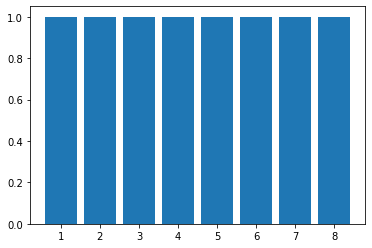

In [77]:
from matplotlib.pyplot import bar

labels = []
elements = []
for i in range(8):
    labels = labels + [i+1]
    elements  = elements + [1]
# visualize the values of elements in the list 
bar(labels,elements)

Iterate the game for one step and visualize the values of elements in the list after each phase.

1st step - query phase:

<BarContainer object of 8 artists>

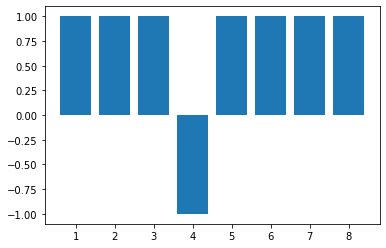

In [78]:
# 
# 1st step - query
#
targetIdx = 3

def flag(elements, idx):
    elements[idx] = elements[idx] * -1
# change the sign of the marked element, i.e., multiply it by -1
flag(elements, targetIdx)

# visualize the values of elements in the list 
bar(labels,elements)

1st step - inversion phase:

<BarContainer object of 8 artists>

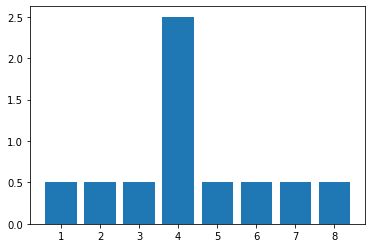

In [79]:
#
# 1st step - inversion
#

# calculate the mean of all values 

# then reflect each element over the mean, e.g.:
#   if the mean is 0, then the reflection of 3 is -3
#   if the mean is 1, then the reflection of 3 is -1
#   if the mean is -1, then the reflection of 3 is -5
def inversion(elements):
    sum = 0
    for e in elements:
        sum += e

    avg = sum/len(elements)

    for i in range(len(elements)):
        elements[i] = avg - (elements[i] - avg)
    
inversion(elements)
# visualize the values of elements in the list 
bar(labels,elements)

Iterate the game for one more step and visualize the values of elements in the list after each phase.

2nd step - query phase:

<BarContainer object of 8 artists>

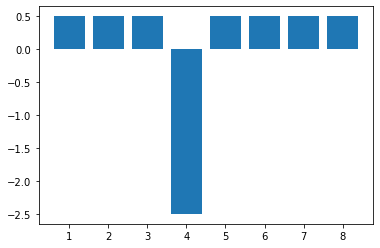

In [80]:
# 
# 2nd step - query
#
flag(elements, targetIdx)

# visualize the values of elements in the list 
bar(labels,elements)

2nd step - inversion phase:

<BarContainer object of 8 artists>

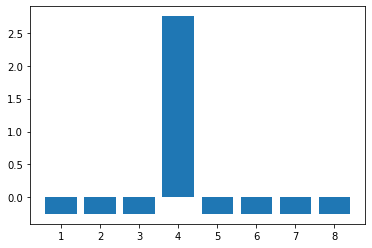

In [81]:
#
# 2nd step - inversion
#
inversion(elements)

# visualize the values of elements in the list 
bar(labels,elements)

Iterate the game three more steps and visualize the values of elements in the list at the end.

<BarContainer object of 8 artists>

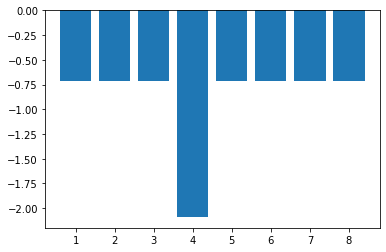

In [82]:
#
# your code is here
#

for i in range(3):
    flag(elements, targetIdx)
    inversion(elements)

# visualize the values of elements in the list 
bar(labels,elements)

<a href="B80_Inversion_About_the_Mean_Solutions.ipynb#task1">click for our solution</a>

<a id="task2"></a>
<h3>Task 2</h3>

Write a function called *query* that 
- takes a list of elements and the list of marked elements,
- change the sign of the marked elements, and then
- returns the list.

Write a function called *inversion* that
- takes a list of elements and
- reflects the value of each element over the mean of all values, and then
- return the list.

We iterate the same game given in Task 1 ($ N = 8 $ and the 4th element is the only marked one) 20 steps by using the functions *query* and *inversion*. 

**This time we trace the values of only the 4th element. We store the values of the 4th element on a list after each step, and then, we display this list as a bar chart.**

In [83]:
def query(elements=[1],marked_elements=[0]):
    for i in marked_elements:
        elements[i] = elements[i] * (-1)
    return elements

In [84]:
def inversion (elements=[1]):
    sum = 0
    for i in range(len(elements)):
        sum += elements[i]

    mean = sum / len(elements)

    for i in range(len(elements)):
        elements[i] = mean - (elements[i]-mean)

    return elements

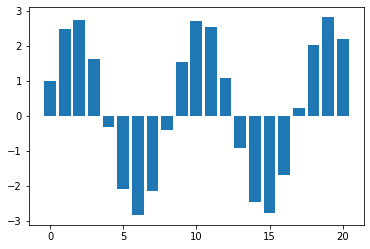

In [85]:
from matplotlib.pyplot import bar

def game_of_n(el_len, marked_el, steps=20, len_fn=None):
    elements = []
    for i in range(el_len):
        elements = elements + [1]

    marked_elements = marked_el
    iterations = []
    L = []

    iterations.append(0)
    L.append(elements[marked_elements[0]])

    for step in range(steps):
        iterations.append(step+1)    
        elements = query(elements,marked_elements)
        if (len_fn != None):
            print('Post Query', 'Step:',step, 'len:',len_fn(elements))
        
        elements = inversion(elements)
        
        if (len_fn != None):
            print('Post Inversion', 'Step:',step, 'len:',len_fn(elements),'\n')

        L.append(elements[marked_elements[0]])

    bar(iterations, L)

game_of_n(8, [3])

<a href="B80_Inversion_About_the_Mean_Solutions.ipynb#task2">click for our solution</a>

<h3>Task 3</h3>

Repeat Task 2 where $ N = 16 $ and the 11th element is marked.

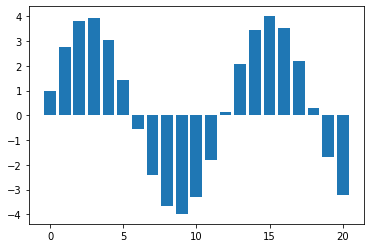

In [86]:
from matplotlib.pyplot import bar

game_of_n(16, [10])

<a href="B80_Inversion_About_the_Mean_Solutions.ipynb#task3">click for our solution</a>

<h3>Task 4</h3>

Repeat Task 3 by tracing only the 5th element where $ N = 16 $ and the 5th, 8th, and 10th elements are marked.

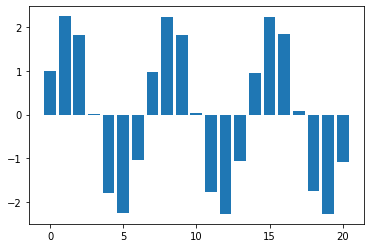

In [87]:
from matplotlib.pyplot import bar

game_of_n(16, [5, 8, 10])

<a href="B80_Inversion_About_the_Mean_Solutions.ipynb#task4">click for our solution</a>

<h3>Task 5</h3>

We iterate the same game 20 steps where $ N = 16 $ and the marked elements are the first four elements. 

Print the length of the list of elements after each query and inversion phases. 

*Remark that the initial length is $ \sqrt{ \sum_{i=1}^{N} 1^2 } = \sqrt{N} = \sqrt{16}  =4 $.*

Post Query Step: 0 len: 4.0
Post Inversion Step: 0 len: 4.0 

Post Query Step: 1 len: 4.0
Post Inversion Step: 1 len: 4.0 

Post Query Step: 2 len: 4.0
Post Inversion Step: 2 len: 4.0 

Post Query Step: 3 len: 4.0
Post Inversion Step: 3 len: 4.0 

Post Query Step: 4 len: 4.0
Post Inversion Step: 4 len: 4.0 

Post Query Step: 5 len: 4.0
Post Inversion Step: 5 len: 4.0 

Post Query Step: 6 len: 4.0
Post Inversion Step: 6 len: 4.0 

Post Query Step: 7 len: 4.0
Post Inversion Step: 7 len: 4.0 

Post Query Step: 8 len: 4.0
Post Inversion Step: 8 len: 4.0 

Post Query Step: 9 len: 4.0
Post Inversion Step: 9 len: 4.0 

Post Query Step: 10 len: 4.0
Post Inversion Step: 10 len: 4.0 

Post Query Step: 11 len: 4.0
Post Inversion Step: 11 len: 4.0 

Post Query Step: 12 len: 4.0
Post Inversion Step: 12 len: 4.0 

Post Query Step: 13 len: 4.0
Post Inversion Step: 13 len: 4.0 

Post Query Step: 14 len: 4.0
Post Inversion Step: 14 len: 4.0 

Post Query Step: 15 len: 4.0
Post Inversion Step: 15 len: 4.

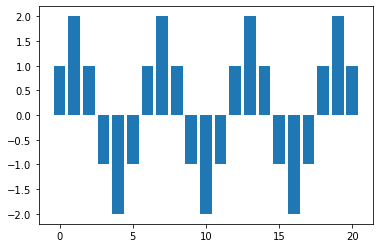

In [88]:
from matplotlib.pyplot import bar

def length_of_list (elements=[1]):
    sum = 0
    for el in elements:
        sum = sum + el**2
    return round(sum**0.5,3)

game_of_n(16, [0,1,2,3], len_fn=length_of_list)

<a href="B80_Inversion_About_the_Mean_Solutions.ipynb#task5">click for our solution</a>

<h3>Task 6 </h3>

Repeat Task 5 where $ N = 10 $ and the last element is marked.

*Remark that the initial length is $ \sqrt{10} $.*

Post Query Step: 0 len: 3.162
Post Inversion Step: 0 len: 3.162 

Post Query Step: 1 len: 3.162
Post Inversion Step: 1 len: 3.162 

Post Query Step: 2 len: 3.162
Post Inversion Step: 2 len: 3.162 

Post Query Step: 3 len: 3.162
Post Inversion Step: 3 len: 3.162 

Post Query Step: 4 len: 3.162
Post Inversion Step: 4 len: 3.162 

Post Query Step: 5 len: 3.162
Post Inversion Step: 5 len: 3.162 

Post Query Step: 6 len: 3.162
Post Inversion Step: 6 len: 3.162 

Post Query Step: 7 len: 3.162
Post Inversion Step: 7 len: 3.162 

Post Query Step: 8 len: 3.162
Post Inversion Step: 8 len: 3.162 

Post Query Step: 9 len: 3.162
Post Inversion Step: 9 len: 3.162 

Post Query Step: 10 len: 3.162
Post Inversion Step: 10 len: 3.162 

Post Query Step: 11 len: 3.162
Post Inversion Step: 11 len: 3.162 

Post Query Step: 12 len: 3.162
Post Inversion Step: 12 len: 3.162 

Post Query Step: 13 len: 3.162
Post Inversion Step: 13 len: 3.162 

Post Query Step: 14 len: 3.162
Post Inversion Step: 14 len: 3.162 



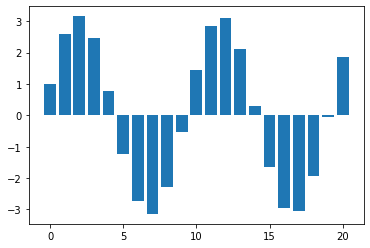

In [89]:
#
# your code is here
#
from matplotlib.pyplot import bar

def length_of_list (elements=[1]):
    sum = 0
    for el in elements:
        sum = sum + el**2
    return round(sum**0.5,3)

game_of_n(10, [9], len_fn=length_of_list)

<a href="B80_Inversion_About_the_Mean_Solutions.ipynb#task6">click for our solution</a>

### Length preserving game

As observed from the last two tasks, each phase of the game is a length preserving operator (function).

*Do you think that query and inversion operators are linear? More specifically, can we represent them in the form of a matrix?*

The answer for the query operator is easy as it only changes the sign of marked elements, and so its matrix form is very similar to an Identity matrix having -1 in some of diagnale entries.

<h3> Modified Game </h3>

In this part, we restrict the game by guaranteeing that the list represents a quantum state.

<h3> Task 7</h3>

What are the initial values for the modifed game if $ N=8 $?

<a href="B80_Inversion_About_the_Mean_Solutions.ipynb#task7">click for our solution</a>

<h3> Task 8</h3>

Iterate the modified game for 20 steps where $ N = 8 $ and the second element is marked.

Print the list of elements after each phase.

Check whether the length of list is 1 after each iteration.

In [91]:
elements = []
for i in range(8):
    elements  = elements + [1/(8**0.5)]

marked_elements = [1]

print("Step 0")
value = ""
for i in range(len(elements)):
    value = value + str(elements[i])+"  "

print("Elements", value)

print("the initial length",length_of_list(elements))
iterations = []
for step in range(20):
    iterations.append(step+1)
    
    elements = query(elements,marked_elements)
    elements = inversion(elements)
    print("After step",step+1,'\nElements list')
    value = ""
    for i in range(len(elements)):
        value = value + str(elements[i])+"  "
    print(value)
    print("the length after iteration is ",length_of_list(elements))
    print()

Step 0
Elements 0.35355339059327373  0.35355339059327373  0.35355339059327373  0.35355339059327373  0.35355339059327373  0.35355339059327373  0.35355339059327373  0.35355339059327373  
the initial length 1.0
After step 1 
Elements list
0.17677669529663687  0.8838834764831842  0.17677669529663687  0.17677669529663687  0.17677669529663687  0.17677669529663687  0.17677669529663687  0.17677669529663687  
the length after iteration is  1.0

After step 2 
Elements list
-0.08838834764831839  0.9722718241315027  -0.08838834764831839  -0.08838834764831839  -0.08838834764831839  -0.08838834764831839  -0.08838834764831839  -0.08838834764831839  
the length after iteration is  1.0

After step 3 
Elements list
-0.30935921676911465  0.5745242597140696  -0.30935921676911465  -0.30935921676911465  -0.30935921676911465  -0.30935921676911465  -0.30935921676911465  -0.30935921676911465  
the length after iteration is  1.0

After step 4 
Elements list
-0.37565047750535346  -0.1104854345603985  -0.37565047

<a href="B80_Inversion_About_the_Mean_Solutions.ipynb#task8">click for our solution</a>

<h3> Task 9</h3>

Repeat Task 8 for $ N = 16 $ where the first 12 elements are marked.

In [64]:
def query(elements=[1],marked_elements=[0]):
    for i in marked_elements:
        elements[i] = -1 * elements[i]    
    return elements

def inversion (elements=[1]):
    summation = 0
    for i in range(len(elements)):
        summation += elements[i]

    mean = summation / len(elements)

    for i in range(len(elements)):
        value = elements[i]
        new_value = mean - (elements[i]-mean)
        elements[i] = new_value   
    return elements

def length_of_list (elements=[1]):
    summation = 0
    for el in elements:
        summation = summation + el**2
    return round(summation**0.5,3)

def print_list(L,precision):
    output = ""
    for i in range(len(L)):
        output = output + str(round(L[i],precision))+"  "
    print(output)

In [65]:
elements = []

for i in range(16):
    elements  = elements + [1 / (8**0.5)]

marked_elements = [0,1,2,3,4,5,6,7,8,9,10,11]

iterations = []

print("step 0")
print("the list of elements is")
value = ""
for i in range(len(elements)):
    value = value + str(elements[i])+"  "
print(value)
print("the initial length",length_of_list(elements))

for step in range(20):
    # store the iteration
    iterations.append(step+1)
    
    # flip the sign of the marked element
    elements = query(elements,marked_elements)
    elements = inversion(elements)
    print()
    print("after step",step+1)
    print("the list of elements is")

    value = ""
    for i in range(len(elements)):
        value = value + str(elements[i])+"  "
    
    print(value)
    print("the length after iteration is ",length_of_list(elements))

step 0
the list of elements is
0.35355339059327373  0.35355339059327373  0.35355339059327373  0.35355339059327373  0.35355339059327373  0.35355339059327373  0.35355339059327373  0.35355339059327373  0.35355339059327373  0.35355339059327373  0.35355339059327373  0.35355339059327373  0.35355339059327373  0.35355339059327373  0.35355339059327373  0.35355339059327373  
the initial length 1.414

after step 1
the list of elements is
0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  -0.7071067811865475  -0.7071067811865475  -0.7071067811865475  -0.7071067811865475  
the length after iteration is  1.414

after step 2
the list of elements is
-0.35355339059327373  -0.35355339059327373  -0.35355339059327373  -0.35355339059327373  -0.35355339059327373  -0.35355339059327373  -0.35355339059327373  -0.35355339059327373  -0.35355339059327373  -0.35355339059327373  -0.35355339059327373  -0.35355339059327373  0.35355339059327373  0.35355339059327373  0.35355339059327373  0.35355339059327373  


<a href="B80_Inversion_About_the_Mean_Solutions.ipynb#task9">click for our solution</a>

<h3> Grover's quantum search algorithm </h3>

The modifed game is the main part of Grover's quantum search algorithm.

Suppose that we are given an unordered list and we make a search of a specific element called as marked.
- We access the list via an oracle: we can make queries to the list.
- If there are $ N $ elements in the list, we use $ \log(N) $ qubits. (Assume that $N$ is a power of 2.) 
- Each basis state, i.e., $ \ket{0 \cdots 0}, \ldots, \ket{1 \cdots 1} $, corresponds to an index of the list.
- If the searched element is detected, then the oracle  flips the sign of the amplitude of the corresponding index.

At the beginning, Hadamard operator is applied to each qubit. Thus, the amplitude of each basis state is set to $ \frac{1}{\sqrt{N}} $.
- We can interpret this as all elements start the game with the same amplitude.
- Then, the game starts to iterate, and the amplitudes of marked and unmarked elements are changed.

<h4> The number of iterations </h4>

When the number of marked elements are less than the unmarked elements, the amplitudes of marked elements start to increase. 

Then, we reach the first peak such that the probability of observing a marked element takes its maximum value. 

After passing this point, the amplitudes of marked elements start to decrease.

<h4> Phases </h4>

The operator in each phase is unitary (linear).

The unitary matrix in the query phase depends on the input, but the unitary operator in the inversion phase does not depend on the input.

<b>In the query phase</b>, the amplitudes of the marked elements change sign.  

<b>In the inversion phase</b>, for each amplitude $ x $, the new value is calculated as $ mean - (x - mean) = 2mean -x $.

The mean of a column vector of size $ N $ can be calculated by multiplying it with the following row vector from the left:

$$  \myvector{ \frac{1}{N} ~~ \frac{1}{N} ~~ \cdots ~~ \frac{1}{N}} . $$


When considering all elements in the list, we work with a matrix. The matrix for the second phase should be 

$$ D = 2 \mymatrix{ccc}{
    \frac{1}{N}  & \cdots & \frac{1}{N} \\ 
    \vdots & \ddots & \vdots \\
    \frac{1}{N}  & \cdots & \frac{1}{N} \\ 
    } 
- I . $$

<h3> Task 10</h3>

Convience yourself that $ D \myvector{x_1 \\ \vdots \\ x_N} = \myvector{ 2m-x_1 \\ \vdots \\ 2m-x_N } $, where $ m = \dfrac{ \sum_{i=1}^N x_i } { N} $.

<h3> Task 11</h3>

Let $ A =  \mymatrix{ccc}{
    \frac{1}{N}  & \cdots & \frac{1}{N} \\ 
    \vdots & \ddots & \vdots \\
    \frac{1}{N}  & \cdots & \frac{1}{N} \\ 
    }  $. 
Convience yourself that $ A^2 = A $ and $ D^T = D $.

Since $ D = 2A - I $, convience yourself that $ D $ is unitary by showing that $ D^T \cdot D = I $, i.e., $ (2A-I)(2A-I) = I $.